<div style= "font-size: 38px; color: DarkRed; text-align: center; font-weight: bold;border-bottom:2px dashed green; line-height: 1cm; "> Prédiction du prix d'un bien logement à l'aide de modèles de Machine Learning.</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/e/ec/LOGO-ENSAE.png" width=80, height=40/>
    
<div style="text-align: center;font-size: 16px;">Supervisé par M. Guillaume BIED</div>

<div style="font-size: 18px;font-family: 'Times New Roman', Times, serif;color: DarkRed;text-align: center;">ALAIS Claire--ALI ZATCHI Afzal--BANCE Youssouf</div>
    
<div style="font-size: 18px;font-family: 'Times New Roman', Times, serif;color: DarkBlue;text-align: center;border-bottom:2px dashed green; line-height: 1cm;"> Octobre - Decembre 2020</div>


## Introduction

Lors de l'achat d'un bien immobilier, le client dépend de l'estimation d'un agent immobilier pour sa négociation. Le savoir-faire de l'agent est pour l'instant essentiel, mais une entreprise voulant estimer beaucoup de biens pourrait vouloir un modèle robuste pour économiser des visites. Justification modèle ~10lignes    
Le but de ce travail est d'estimer le prix d'un logement en fonction de ses caractéristiques intrinsèques (nombre de pièces, surface, exposition...), de sa localisation (commune, département,...) et de son environnement (proximité des transports). Pour cela nous utilisons les informations des annonces de vente de maisons ou d'appartements en Ile-de-France issues du site [bienici.com]( https://www.bienici.com ).    
La première partie concerne l'extraction des données, leur nettoyage et mise en forme. La deuxième partie donne des statistiques descriptives sur les différents paramètres. Dans la troisième partie plusieurs modèles sont comparés pour prédire le prix de vente.

In [6]:
os.getcwd()

'C:\\Users\\ALI ZATCHI Afzal\\Desktop\\PJET PYthon\\Donnees & Préprocessing Code'

In [2]:
import pandas as pd
import numpy as np
import time
import substring
import sklearn
import seaborn as sns
import scipy as stats
import os
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

## I. Extraction des données et prétraitement

Nous tirons les informations des annonces immobilères publiées sur le site bienici.fr en nous restreignant à l'Ile-de-France.

### 1. Collecte des données: webscrapping dynamique

### 2. Préparation de la base de données

Pour la suite nous utilisons par défaut la base telle que collectée le 9 décembre 2020, disponible dans le dossier sous le nom 'export_dataframe.csv'.

#### Fusion des données

In [90]:
####
os.chdir("C:/Users/ALI ZATCHI Afzal/Desktop/PJET PYthon/Donnees & Préprocessing Code/base_for_preprocessing")

In [17]:
ES91_maison_0_604=pd.read_csv("ES91_maison_0_604.csv") # ok
ES91_maison_605_=pd.read_csv("ES91_maison_605_.csv") # ok
HS92_maison=pd.read_csv("HS92_maison.csv") # ok 
PA75_maison=pd.read_csv("PA75_maison.csv") # ok
YV78_maison_749_1274=pd.read_csv("YV78_maison_749_1274.csv") # ok
YV78_maison_de_0_749=pd.read_csv("YV78_maison_de_0_749.csv") # ok
MS77_maison_0_1262=pd.read_csv("MS77_maison_0_1262.csv") # ok
DB_VM94_maison=pd.read_csv("DB_VM94_maison.csv") # ok

In [18]:
donnees_Ile_De_France = pd.concat([ES91_maison_0_604,
                                   ES91_maison_605_,
                                   HS92_maison,
                                   PA75_maison,
                                   MS77_maison_0_1262,
                                   YV78_maison_de_0_749,
                                   DB_VM94_maison,
                                   YV78_maison_749_1274],ignore_index=True)

In [19]:
#donnees_Ile_De_France.drop(donnees_Ile_De_France.index[[2698,2875,2919,3115,3116,3127]],inplace=True)
data=donnees_Ile_De_France

In [20]:
data

,Unnamed: 0,id_hourse,Addresse,Titre,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Ascenseur,Terrasse,Garage,Prix_sur,Reference,Date_publication,Date_modification,Titre_description,Description
0,0,ES91_0,Boussy-Saint-Antoine 91800,"Achat maison 4 pièces 128 m², Boussy-Saint-Ant...",414 500 €,128 m²,4 pièces,3 chambres,2 places de parking,Jardin,NaN,NaN,NaN,3 238 €/m²,Réf. de l’annonce : 098906E1QEZB,Publiée le 12 oct. 2020,Modifiée le 6 nov. 2020,Descriptif de cette maison à vendre de 4 pièce...,"Maison Boussy Saint Antoine 4 pièce(s) 128 m2,..."
1,1,ES91_1,Chilly-Mazarin 91380 (Gravigny),"Achat maison 4 pièces 82 m², Chilly-Mazarin - ...",357 000 €,"81,78 m²",4 pièces,3 chambres,3 places de parking,Jardin,NaN,1 terrasse,NaN,4 365 €/m²,Réf. de l’annonce : 3310,Publiée il y a plus de 2 mois,Modifiée le 12 oct. 2020,Descriptif de cette maison à vendre de 4 pièce...,Vente d'une maison F4 à CHILLY MAZARIN. MAISON...
2,2,ES91_2,Sainte-Geneviève-des-Bois 91700 (Georges Pitard),"Achat maison 6 pièces 163 m², Sainte-Geneviève...",450 000 €,163 m²,6 pièces,4 chambres,3 places de parking,Jardin,NaN,NaN,NaN,2 761 €/m²,Réf. de l’annonce : 09891902QHRQ,Publiée il y a plus de 2 mois,Modifiée le 27 nov. 2020,Descriptif de cette maison à vendre de 6 pièce...,Maison STE GENEVIEVE DES BOIS 6 pièce(s) 160 m...
3,3,ES91_3,Longjumeau 91160 (Gubanski - Sud),"Achat maison 7 pièces 154 m², Longjumeau - 467...",467 500 €,154 m²,7 pièces,4 chambres,8 places de parking,Jardin,NaN,NaN,NaN,3 036 €/m²,Réf. de l’annonce : 098023E1LUDE,Publiée il y a plus de 2 mois,Modifiée le 6 nov. 2020,Descriptif de cette maison à vendre de 7 pièce...,Maison Longjumeau 7 pièce(s) 154 m2 / 2 double...
4,4,ES91_4,Morsang-sur-Orge 91390 (Langevin),"Achat maison 7 pièces 155 m², Morsang-sur-Orge...",465 000 €,155 m²,7 pièces,5 chambres,6 places de parking,Jardin,NaN,NaN,NaN,3 000 €/m²,Réf. de l’annonce : 098061E1LN0N,Publiée il y a plus de 2 mois,Modifiée le 1 déc. 2020,Descriptif de cette maison à vendre de 7 pièce...,Maison Morsang Sur Orge. EXCLUSIVITÉ - MORSANG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,515,YV78_1269,Bouafle 78410,"Achat maison 7 pièces 245 m², Bouafle - 625 000 €",625 000 €,245 m²,7 pièces,4 chambres,2 places de parking,Jardin,NaN,1 terrasse,NaN,2 551 €/m²,NaN,Publiée il y a plus de 2 mois,Réf. de l’annonce : 577,Descriptif de cette maison à vendre de 7 pièce...,Maison 144m² + dépendance 101m². Dans la ville...
6174,516,YV78_1270,Porcheville 78440,"Achat maison 6 pièces 145 m², Porcheville - 28...",280 000 €,145 m²,6 pièces,4 chambres,2 places de parking,Jardin,NaN,NaN,NaN,1 862 €/m²,Réf. de l’annonce : 007055E1NFTG,Publiée il y a plus de 2 mois,Modifiée le 14 nov. 2020,Descriptif de cette maison à vendre de 6 pièce...,Maison familiale Porcheville 7 pièce(s) 145 m2...
6175,517,YV78_1271,Sartrouville 78500 (Le Val Notre-Dame),"Achat maison 5 pièces 160 m², Sartrouville - 5...",566 000 €,160 m²,5 pièces,3 chambres,2 places de parking,Jardin,NaN,NaN,Garage,3 538 €/m²,Réf. de l’annonce : 749571019-4,Publiée il y a plus de 2 mois,Modifiée le 2 déc. 2020,Descriptif de cette maison à vendre de 5 pièce...,"Pavillon Beaux Volumes. Sartrouville, dans un ..."
6176,518,YV78_1272,Verneuil-sur-Seine 78480 (Les Clairières - Les...,"Achat maison 7 pièces 145 m², Verneuil-sur-Sei...",484 000 €,145 m²,7 pièces,5 chambres,2 parkings extérieurs,Jardin de 801 m²,NaN,NaN,2 garages,3 172 €/m²,Réf. de l’annonce : 31490007,Publiée il y a plus de 2 mois,Modifiée le 21 oct. 2020,Descriptif de cette maison à vendre de 7 pièce...,Une maison des années 1970 située dans un cadr...


#### Fonction de Nettoyage

In [21]:
def Clean(data):
    # Copie de la data
    donnee=data
    
    donnee.drop(columns='Unnamed: 0',inplace=True)
    # Prix
    donnee["PrixR"]=donnee.Prix.str.replace("€","").str.replace(" ","")
    donnee["PrixR"]=donnee['PrixR'].astype(float)

    ## Surface
    donnee['SurfaceR']=donnee.Surface.str.replace("m²","").str.replace(",",".")
    donnee['SurfaceR']=donnee.SurfaceR.astype(float)

    ## Pieces
    donnee['Nb_PiecesR']=donnee.Nb_piece.str.replace("pièce","").str.replace("s","").str.replace(" ","")
    donnee["Nb_PiecesR"]=donnee.Nb_PiecesR.astype(float)

    ### Chambres
    donnee['Nb_ChambresR']=donnee.Nb_chambre.str.replace("chambre","").str.replace("s","").str.replace(" ","")
    donnee["Nb_ChambresR"]=donnee.Nb_ChambresR.astype(float)

    ### Adresse  et  Zone: Emplacement( Ville, Commune, Je ne sais pas trop)

    ## Exemple Asnières-sur-Seine 92600 (Coubertin)
    #   DepartR= 92600    ZoneR = "Asnières-sur-Seine" 
    #   EmplacementR = "(Coubertin)"

    # Departement
    dep=[''.join([i for i in j if i.isdigit()][-5:]) for j in donnee.Addresse]
    dep=[str(i) for i in dep]
    donnee["postal_code"]=dep
    
    depl=[''.join([i for i in j if i.isdigit()]) for j in data.Addresse]
    depl=[i[:2] for i in depl]
    donnee["Dep"]=depl

    # ZoneR
    secteur=[''.join([i for i in j if not i.isdigit()]) for j in donnee.Addresse]
    donnee["ZoneR"]=secteur


    ##  Emplacement exact( Précisé entre Parenthèses)
    donnee["EmplacementR"]=[substring.substringByChar(i, startChar="(", endChar=")").replace('(','').replace(')','') if i.find('(')>=0 else i for i in donnee.ZoneR]

    ### Parking
    park=donnee.Parking.fillna('')
    park.replace('',np.nan)
    park=[''.join([i for i in j if i.isdigit()]) for j in park]
    park=[np.nan if i=='' else float(i) for i in park]
    donnee["ParkingR"]=park

    ## Les Nan pour les parking représentent les maisons sans parking( je pense)
    donnee['ParkingR']=donnee['ParkingR'].fillna(0)

    ## Jardin 
    donnee['JardinR']=~donnee.Jardin.isna()

    ### Ascenseur : Inutile visuellement Ne contient que les Na/ En meme tps
    # Les maisons n'ont pas d'ascenseur
    return donnee

In [22]:
data=Clean(data)

In [23]:
data

,id_hourse,Addresse,Titre,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Ascenseur,...,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,DepartR,Dep,ZoneR,EmplacementR,ParkingR,JardinR
0,ES91_0,Boussy-Saint-Antoine 91800,"Achat maison 4 pièces 128 m², Boussy-Saint-Ant...",414 500 €,128 m²,4 pièces,3 chambres,2 places de parking,Jardin,NaN,...,414500.0,128.00,4.0,3.0,91800,91,Boussy-Saint-Antoine,Boussy-Saint-Antoine,2.0,True
1,ES91_1,Chilly-Mazarin 91380 (Gravigny),"Achat maison 4 pièces 82 m², Chilly-Mazarin - ...",357 000 €,"81,78 m²",4 pièces,3 chambres,3 places de parking,Jardin,NaN,...,357000.0,81.78,4.0,3.0,91380,91,Chilly-Mazarin (Gravigny),Gravigny,3.0,True
2,ES91_2,Sainte-Geneviève-des-Bois 91700 (Georges Pitard),"Achat maison 6 pièces 163 m², Sainte-Geneviève...",450 000 €,163 m²,6 pièces,4 chambres,3 places de parking,Jardin,NaN,...,450000.0,163.00,6.0,4.0,91700,91,Sainte-Geneviève-des-Bois (Georges Pitard),Georges Pitard,3.0,True
3,ES91_3,Longjumeau 91160 (Gubanski - Sud),"Achat maison 7 pièces 154 m², Longjumeau - 467...",467 500 €,154 m²,7 pièces,4 chambres,8 places de parking,Jardin,NaN,...,467500.0,154.00,7.0,4.0,91160,91,Longjumeau (Gubanski - Sud),Gubanski - Sud,8.0,True
4,ES91_4,Morsang-sur-Orge 91390 (Langevin),"Achat maison 7 pièces 155 m², Morsang-sur-Orge...",465 000 €,155 m²,7 pièces,5 chambres,6 places de parking,Jardin,NaN,...,465000.0,155.00,7.0,5.0,91390,91,Morsang-sur-Orge (Langevin),Langevin,6.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,YV78_1269,Bouafle 78410,"Achat maison 7 pièces 245 m², Bouafle - 625 000 €",625 000 €,245 m²,7 pièces,4 chambres,2 places de parking,Jardin,NaN,...,625000.0,245.00,7.0,4.0,78410,78,Bouafle,Bouafle,2.0,True
6174,YV78_1270,Porcheville 78440,"Achat maison 6 pièces 145 m², Porcheville - 28...",280 000 €,145 m²,6 pièces,4 chambres,2 places de parking,Jardin,NaN,...,280000.0,145.00,6.0,4.0,78440,78,Porcheville,Porcheville,2.0,True
6175,YV78_1271,Sartrouville 78500 (Le Val Notre-Dame),"Achat maison 5 pièces 160 m², Sartrouville - 5...",566 000 €,160 m²,5 pièces,3 chambres,2 places de parking,Jardin,NaN,...,566000.0,160.00,5.0,3.0,78500,78,Sartrouville (Le Val Notre-Dame),Le Val Notre-Dame,2.0,True
6176,YV78_1272,Verneuil-sur-Seine 78480 (Les Clairières - Les...,"Achat maison 7 pièces 145 m², Verneuil-sur-Sei...",484 000 €,145 m²,7 pièces,5 chambres,2 parkings extérieurs,Jardin de 801 m²,NaN,...,484000.0,145.00,7.0,5.0,78480,78,Verneuil-sur-Seine (Les Clairières - Les Rena...,Les Clairières - Les Renardières,2.0,True


## II. Description des caractéristiques des logements

### 1. Description univariée des caractéristiques

In [24]:
donnee=data
donnee.columns

Index(['id_hourse', 'Addresse', 'Titre', 'Prix', 'Surface', 'Nb_piece',
       'Nb_chambre', 'Parking', 'Jardin', 'Ascenseur', 'Terrasse', 'Garage',
       'Prix_sur', 'Reference', 'Date_publication', 'Date_modification',
       'Titre_description', 'Description', 'PrixR', 'SurfaceR', 'Nb_PiecesR',
       'Nb_ChambresR', 'DepartR', 'Dep', 'ZoneR', 'EmplacementR', 'ParkingR',
       'JardinR'],
      dtype='object')

In [25]:
dataSubset=donnee[['id_hourse','PrixR', 'SurfaceR', 'Nb_PiecesR',
       'Nb_ChambresR', 'ParkingR', 'JardinR', 'Dep', 'ZoneR',
       'EmplacementR']]

In [26]:
dataSubset

,id_hourse,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR,JardinR,Dep,ZoneR,EmplacementR
0,ES91_0,414500.0,128.00,4.0,3.0,2.0,True,91,Boussy-Saint-Antoine,Boussy-Saint-Antoine
1,ES91_1,357000.0,81.78,4.0,3.0,3.0,True,91,Chilly-Mazarin (Gravigny),Gravigny
2,ES91_2,450000.0,163.00,6.0,4.0,3.0,True,91,Sainte-Geneviève-des-Bois (Georges Pitard),Georges Pitard
3,ES91_3,467500.0,154.00,7.0,4.0,8.0,True,91,Longjumeau (Gubanski - Sud),Gubanski - Sud
4,ES91_4,465000.0,155.00,7.0,5.0,6.0,True,91,Morsang-sur-Orge (Langevin),Langevin
...,...,...,...,...,...,...,...,...,...,...
6173,YV78_1269,625000.0,245.00,7.0,4.0,2.0,True,78,Bouafle,Bouafle
6174,YV78_1270,280000.0,145.00,6.0,4.0,2.0,True,78,Porcheville,Porcheville
6175,YV78_1271,566000.0,160.00,5.0,3.0,2.0,True,78,Sartrouville (Le Val Notre-Dame),Le Val Notre-Dame
6176,YV78_1272,484000.0,145.00,7.0,5.0,2.0,True,78,Verneuil-sur-Seine (Les Clairières - Les Rena...,Les Clairières - Les Renardières


In [27]:
dataSubset.describe()

,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR
count,6.089000e+03,6057.000000,6081.000000,6032.000000,6178.000000
mean,6.167527e+05,150.074806,6.060681,3.868700,1.155876
std,1.069838e+06,83.612773,3.165205,1.404331,2.249346
min,2.596600e+04,16.510000,1.000000,1.000000,0.000000
25%,3.120000e+05,97.990000,5.000000,3.000000,0.000000
50%,4.430000e+05,130.000000,6.000000,4.000000,0.000000
75%,6.799000e+05,175.000000,7.000000,5.000000,2.000000
max,6.000000e+07,990.000000,166.000000,32.000000,99.000000


In [28]:
### 
dataSubset.corr()

,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR,JardinR
PrixR,1.000000,0.540392,0.427750,0.354132,0.008135,-0.077554
SurfaceR,0.540392,1.000000,0.579588,0.684230,0.145032,0.063997
Nb_PiecesR,0.427750,0.579588,1.000000,0.630537,0.092185,0.079363
Nb_ChambresR,0.354132,0.684230,0.630537,1.000000,0.106755,0.106745
ParkingR,0.008135,0.145032,0.092185,0.106755,1.000000,0.121217
JardinR,-0.077554,0.063997,0.079363,0.106745,0.121217,1.000000


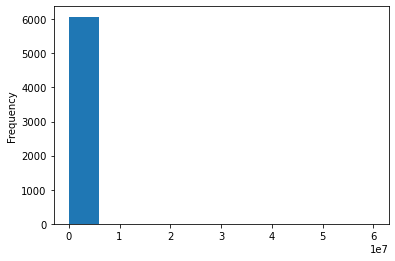

In [29]:
dataSubset.PrixR.plot.hist()

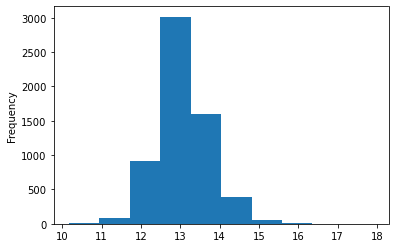

In [30]:
dataSubset.PrixR.apply(np.log).plot.hist()

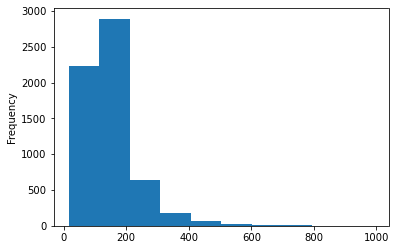

In [31]:
dataSubset['SurfaceR'].plot.hist()

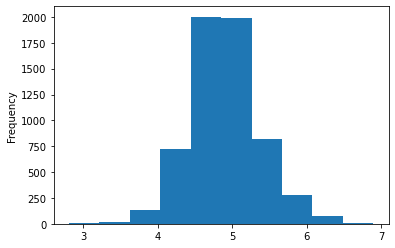

In [32]:
dataSubset['SurfaceR'].apply(np.log).plot.hist()

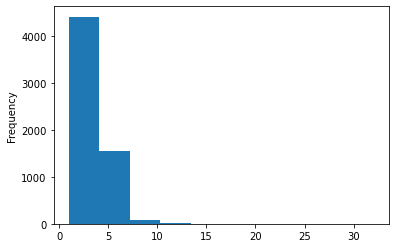

In [33]:
dataSubset['Nb_ChambresR'].plot.hist()

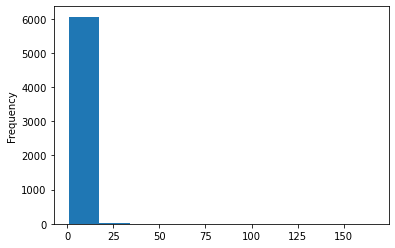

In [34]:
dataSubset['Nb_PiecesR'].plot.hist()

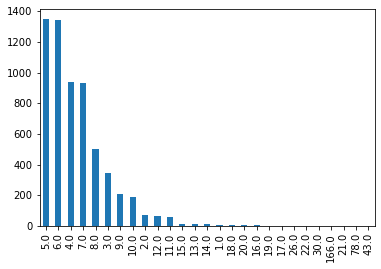

In [35]:
dataSubset['Nb_PiecesR'].value_counts().plot.bar()

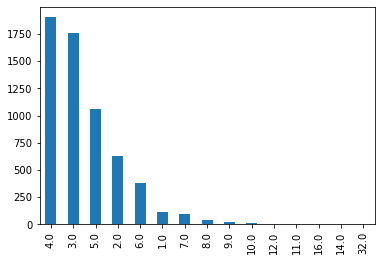

In [36]:
dataSubset['Nb_ChambresR'].value_counts().plot.bar()

### 2. Corrélations

In [37]:
import seaborn as sns
import scipy as stats

In [38]:
Quanti=dataSubset[['PrixR', 'SurfaceR', 'Nb_PiecesR','Nb_ChambresR','ParkingR']]
Quanti

,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR
0,414500.0,128.00,4.0,3.0,2.0
1,357000.0,81.78,4.0,3.0,3.0
2,450000.0,163.00,6.0,4.0,3.0
3,467500.0,154.00,7.0,4.0,8.0
4,465000.0,155.00,7.0,5.0,6.0
...,...,...,...,...,...
6173,625000.0,245.00,7.0,4.0,2.0
6174,280000.0,145.00,6.0,4.0,2.0
6175,566000.0,160.00,5.0,3.0,2.0
6176,484000.0,145.00,7.0,5.0,2.0


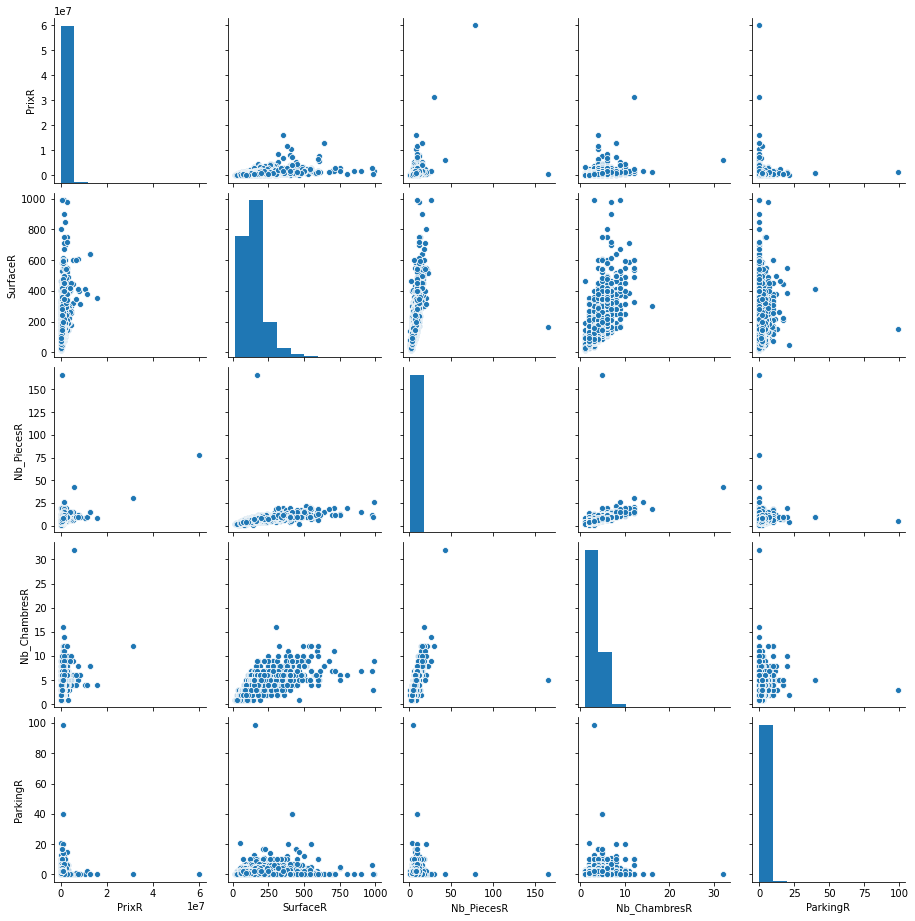

In [39]:
sns.pairplot(Quanti)

### 3.Effet de la localisation

Pour chaque annonce immobilière, l'emplacement est donné par le nom de la commune, parfois une indication sur le quartier à l'intérieur de la commune, et le code postal : c'est cette dernière information que nous utilisons. La base +code-insee-code-postal.json+ donne les coordonnées géographiques associées à chaque code postal, ce qui nous permet d'afficher le prix moyen du mètre carré et la surface moyenne des logements par code postal, et pour information le nombre d'annonces concernées dans chaque zone. En général il y a peu d'annonces par zone, nous regardons alors aussi ces données par département. Un code postal correspond approximativement à une commune (mais distingue les arrondissements de Paris par exemple).

In [6]:
codegeo = gpd.read_file('code-insee-code-postal.geojson')
data_subset=donnee[['id_hourse','PrixR', 'SurfaceR', 'postal_code']]
data_subset['Prix_m2']=data_subset['PrixR']/data_subset['SurfaceR']
data_agg = data_subset.groupby('postal_code').agg({'id_hourse':'nunique','Prix_m2':'mean','SurfaceR':'mean'}).reset_index()
data_postal_code = codegeo.merge(data_agg, on ='postal_code', how='inner')

NameError: name 'gpd' is not defined

Prix du mètre carré moyen par code postal:

In [ ]:
data_postal_code.plot(column="Prix_m2")

Surface moyenne des logements mis en vente par code postal:

In [ ]:
data_postal_code.plot(column="SurfaceR")

Nombre d'annonces par code postal:

In [ ]:
data_postal_code.plot(column="id_hourse")

## 4. Modélisation: mise en oeuvre de méthodes de machine learning

### 1. Modélisation à partir des caractéristiques numériques

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
Quanti=Quanti.dropna()

In [42]:
Quanti.shape

(6002, 5)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(
    Quanti[[i for i in Quanti.columns if i != 'PrixR']],
    Quanti['PrixR'].to_numpy().ravel(),
    test_size=0.2, random_state=0
)

In [44]:
ols = LinearRegression()
ols.fit(x_train, y_train)
y_pred = ols.predict(x_test)

In [45]:
ols.intercept_

3653.95710597781

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [47]:
r2 = r2_score(y_test, y_pred)
r2

0.30320147298176303

In [48]:
mse = mean_squared_error(y_test, y_pred)
mse

294654965467.8929

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [50]:
results_sm = sm.OLS(Quanti['PrixR'], 
        Quanti[[i for i in Quanti.columns if i != 'PrixR']]).fit()

In [51]:

results_sm = sm.OLS(Quanti['PrixR'], 
        Quanti[[i for i in Quanti.columns if i != 'PrixR']],
                   cov_type='HC1').fit()

In [52]:
results_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PrixR   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.627
Method:                 Least Squares   F-statistic:                              2524.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:58:15   Log-Likelihood:                         -87667.
No. Observations:                6002   AIC:                                  1.753e+05
Df Residuals:                    5998   BIC:                                  1.754e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
SurfaceR      4329.8556    117.968     36.704      0.000    4098.595    4561.116
Nb_PiecesR     589.8910   3028.111      0.195      0.846   -5346.295    6526.077
Nb_ChambresR -9386.8816   5870.161     -1.599      0.110   -2.09e+04    2120.744
ParkingR     -1.553e+04   3058.722     -5.078      0.000   -2.15e+04   -9536.199
==============================================================================
Omnibus:                     9275.336   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8572203.047
Skew:                           9.475   Prob(JB):                         0.00
Kurtosis:                     187.169   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
scaler.fit(Quanti)
df_scaled = scaler.transform(Quanti.fillna(0))

In [55]:
column_names = Quanti.columns[Quanti.columns != "PrixR"]
X = df_scaled[:, Quanti.columns != "PrixR"]
y = Quanti["PrixR"].copy()
y[pd.isnull(y)] = y.median()
y = y.values.ravel()
#y = df_scaled[:, df.columns == 'rep16_frac']

In [56]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [58]:
pd.isnull(ytrain).sum()

0

In [59]:
lasso_ = Lasso(fit_intercept=True)
lasso_.fit(xtrain, ytrain)

Lasso()

In [60]:
lasso_.coef_

array([328043.8331437 ,   3875.57637312,   7018.83243508, -51068.60596032])

In [61]:
column_names[lasso_.coef_ != 0]

Index(['SurfaceR', 'Nb_PiecesR', 'Nb_ChambresR', 'ParkingR'], dtype='object')

### 2. Prédiction à partir des photographies

## Conclusion